# Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist_get_images import get_images

%matplotlib inline

In [4]:
mnist_path = './mnist_raw/'

In [5]:
X_train_num, y_train_num, X_test_num, y_test_num = get_images(mnist_path)
# Testing data
print(f'Training data dimensions: {X_train_num.shape} \nTesting data dimensions: {X_test_num.shape}')

Training data dimensions: (60000, 28, 28) 
Testing data dimensions: (10000, 28, 28)


## Images to vectors in float32

In [6]:
X_train = X_train_num[:50_000].reshape(50_000, -1).astype(np.float32)/255
y_train = y_train_num[:50_000].reshape(50_000, 1)

x_validation = X_train_num[50_000:].reshape(10_000, -1).astype(np.float32)/255
y_validation = y_train_num[50_000:].reshape(10_000, 1)

X_test = X_test_num.copy().reshape(10_000, -1).astype(np.float32)/255
y_test = y_test_num.copy().reshape(10_000, 1)

# Testing set
print(f'X_train: {X_train.max()} \n')

# Shape
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: 1.0 

X_train: (50000, 784)
y_train: (50000, 1)
X_test: (10000, 784)
y_test: (10000, 1)


## Graph image

In [7]:
def plot_img_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

The image shown corresponds to: [8]


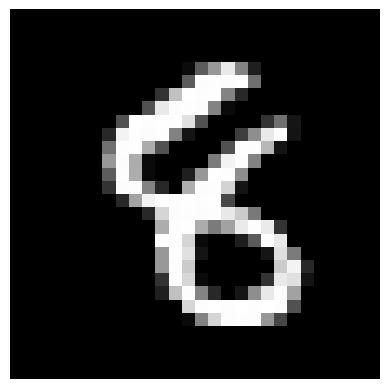

In [17]:
rand_idx = np.random.randint(len(y_test))
print(f'The image shown corresponds to: {y_test[rand_idx]}')
plot_img_number(X_test_num[rand_idx])

### Forward Propagation y Función de Costo en Redes Neuronales

Este conjunto de ecuaciones describe el flujo de un modelo de red neuronal simple, que consta de una capa de entrada, una capa oculta con función de activación ReLU, y una capa de salida con función de activación Softmax para clasificación. Luego, se usa la función de pérdida de entropía cruzada (Cross-Entropy Loss) para calcular el error entre las predicciones y los valores verdaderos, y finalmente, se calcula el costo total como el promedio de las pérdidas en todas las muestras.

1. **Forward Propagation (Primera capa oculta):**

   $$ z^{(1)} = W^{(1)} X + b^{(1)} $$
   
   Donde:
   - $ z^{(1)} $ es la salida lineal de la primera capa.
   - $ W^{(1)} $ es la matriz de pesos de la primera capa.
   - $ X $ es el conjunto de características de entrada.
   - $ b^{(1)} $ es el vector de sesgo de la primera capa.

2. **Activación (ReLU) en la primera capa:**

   $$ a^{(1)} = \text{ReLU}(z^{(1)}) $$
   
   Donde:
   - $ a^{(1)} $ es la salida de la función de activación ReLU, que aplica una transformación no lineal a $ z^{(1)} $.

3. **Forward Propagation (Segunda capa de salida):**

   $$ z^{(2)} = W^{(2)} a^{(1)} + b^{(2)} $$
   
   Donde:
   - $ z^{(2)} $ es la salida lineal de la segunda capa.
   - $ W^{(2)} $ es la matriz de pesos de la segunda capa.
   - $ a^{(1)} $ es la salida de la primera capa después de la activación.
   - $ b^{(2)} $ es el vector de sesgo de la segunda capa.

4. **Función de activación Softmax (para obtener las probabilidades de cada clase):**

   $$ \hat{y} = \frac{e^{z_k^{(2)}}}{\sum_j e^{z_j^{(2)}}} $$
   
   Donde:
   - $ \hat{y} $ representa las probabilidades predichas para cada clase.
   - $ e^{z_k^{(2)}} $ es la exponencial de la salida $ z_k^{(2)} $ para una clase $ k $.
   - $ \sum_j e^{z_j^{(2)}} $ es la suma de exponenciales para todas las clases $ j $, lo que asegura que las probabilidades sumen 1.

5. **Función de pérdida (Cross-Entropy):**

   $$ \mathcal{L}(\hat{y}^i, y^i) = -y^i \ln(\hat{y}^i) = -\ln(\hat{y}^i) $$
   
   Donde:
   - $ \mathcal{L}(\hat{y}^i, y^i) $ es la pérdida para la muestra $ i $.
   - $ y^i $ es el valor verdadero de la clase (en codificación one-hot).
   - $ \hat{y}^i $ es la probabilidad predicha para la clase verdadera.

6. **Función de costo promedio para todo el conjunto de datos:**

   $$ J(w, b) = \frac{1}{\text{num\_samples}} \sum_{i=1}^{\text{num\_samples}} -\ln(\hat{y}^i) $$
   
   Donde:
   - $ J(w, b) $ es el costo total del modelo, calculado como el promedio de la pérdida en todas las muestras.
   - $ \text{num\_samples} $ es el número total de muestras en el conjunto de datos.
   - $ -\ln(\hat{y}^i) $ es la pérdida para la muestra $ i $.


## Mini-Batches 

2 layers 200-10

In [ ]:
def create_minibatches(mb_size, x, y, shuffle=True):
    """
    x = (number of samples, 784)
    y = (nuumber of samples, 1)
    """
    assert x.shape[0] == y.shape[0], "Error in the number of samples"
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x, y = x[idxs], y[idxs]

    return (
        (x[i : i + mb_size], y[i : i + mb_size]) for i in range(0, total_data, mb_size)
    )

## Init parameters

In [ ]:
def init_parameters(input_size, neurons):
    """
    input_size = (input elements, 784)
    neurons = list[200, 10] amount of neurons in every layer
    """
    w1 = np.random.randn(neurons[0], input_size) * 0.001
    b1 = np.zeros((neurons[0], 1))

    w2 = np.random.randn(neurons[1], neurons[0]) * 0.001
    b2 = np.zeros((neurons[1], 1))

    return {"w1": w1, "b1": b1, "w2": w2, "b2": b2}

In [ ]:
parameters = init_parameters(28 * 28, [200, 10])
print(f'{parameters["w1"].shape}')
print(f'{parameters["w2"].shape}')
print(f'{parameters["b2"].shape}')

(200, 784)
(10, 200)
(10, 1)


In [10]:
def relu(x):
    return np.maximum(0, x)

In [ ]:
def scores(x, parameters, act_function):
    """'
    X has shape (number of pixels, number of samples)
    """
    z1 = parameters["w1"] @ x + parameters["b1"]
    a1 = act_function(z1)  # Return action function
    z2 = parameters["w2"] @ a1 + parameters["b2"]

    return z2, z1, a1

In [12]:
scores, z1, a1, = scores(X_train[:64].T, parameters, relu)

In [13]:
X_train[:64].T.shape

(784, 64)

In [14]:
def softmax(x):
    exp_scores = np.exp(x)
    sum_exp_scores = np.sum(exp_scores, axis=0)
    probs = exp_scores / sum_exp_scores
    return probs

In [15]:
def x_entropy(scores, y, batch_size=64):
    probs = softmax(scores)
    y_hat = probs[y. squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size

    return probs, cost

In [16]:
y_train.squeeze()[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
def backward(probs, x, y, z1, a1, parameters, batch_size=64):
    grads = {}
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # y-hat - y
    dz2 = probs.copy()

    dW2 = dz2 @ a1.T / batch_size
    db2 = np.sum(dz2, axis=1, keepdims=True) / batch_size
    da1 = parameters["w2"].T @ dz2

    dz1 = da1.copy()
    dz1[z1 <= 0] = 0

    dW1 = dz1 @ x
    db1 = np.sum(dz1, axis=1, keepdims=True)

    assert parameters["w1"].shape == dW1.shape, "W1 shape mismatch"
    assert parameters["w2"].shape == dW2.shape, "W2 shape mismatch"
    assert parameters["b1"].shape == db1.shape, "b1 shape mismatch"
    assert parameters["b2"].shape == db2.shape, "b1 shape mismatch"

    grads = {"w1": dW1, "b1": db1, "w2": dW2, "b2": db2}

    return grads

In [18]:
y_hat, cost = x_entropy(scores, y_train[:64])
y_hat.shape

(10, 64)

In [19]:
grads = backward(y_hat, X_train[:64], y_train[:64], z1, a1, parameters)

In [ ]:
def accuracy(X_data, y_data, mb_size=64):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, X_data, y_data)):
        points, z1, a1 = scores(x.T, parameters, relu)
        y_hat, cost = x_entropy(points, y, batch_size=len(x))

        correct += np.sum(np.argmax(y_hat, axis=0) == y.squeeze())
        total += y_hat.shape[1]

    return correct / total

In [ ]:
def train(epochs, parameters, mb_size=64, learning_rate=1e-3):
    for _ in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, X_train, y_train)):
            points, z1, a1 = scores(x.T, parameters, relu)
            y_hat, cost = x_entropy(points, y, batch_size=len(x))
            grads = backward(y_hat, x, y, z1, a1, parameters, batch_size=len(x))

            parameters["w1"] = parameters["w1"] - learning_rate * grads["w1"]
            parameters["b1"] = parameters["b1"] - learning_rate * grads["b1"]
            parameters["b2"] = parameters["b2"] - learning_rate * grads["b2"]
            parameters["w2"] = parameters["w2"] - learning_rate * grads["w2"]

        print(
            f"Cost is: {cost}, y accuracy is: {accuracy(x_validation, y_validation, mb_size)}"
        )
    return parameters

In [ ]:
mb_size = 512
learning_rate = 1e-2
epochs = 20
print(type(relu))
parameters = train(
    epochs=epochs, parameters=parameters, mb_size=mb_size, learning_rate=learning_rate
)

<class 'function'>


TypeError: 'numpy.ndarray' object is not callable